# Dataset Cleaning and Visualization

Dataset source: https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import LabelEncoder, StandardScaler 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
src = pd.read_csv('/content/drive/Shareddrives/CIS 520/final project/hotel_bookings.csv')
# src

Mounted at /content/drive


## Get the Resort-Hotel-Only Dataset 

`src` -> `df`

In [ ]:
## Select the resort hotel subset 
df = src[src['hotel']=='Resort Hotel']
## drop `hotel`
df = df.drop(['hotel'], axis=1)
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,NaN,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,NaN,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [ ]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                       1.000000
required_car_parking_spaces       0.243863
lead_time                         0.229444
booking_changes                   0.114835
previous_cancellations            0.114173
adr                               0.109317
is_repeated_guest                 0.103563
total_of_special_requests         0.101295
children                          0.081234
adults                            0.080546
stays_in_weekend_nights           0.078569
stays_in_week_nights              0.078477
previous_bookings_not_canceled    0.076767
arrival_date_year                 0.043624
agent                             0.038899
days_in_waiting_list              0.036301
babies                            0.023254
arrival_date_week_number          0.021601
arrival_date_day_of_month         0.009386
company                           0.001418
Name: is_canceled, dtype: float64

In [ ]:
## Check NaN
print(pd.DataFrame({'#NaN': df.isnull().sum(), 
                    '%NaN': round(df.isnull().mean() * 100, 2)}))

                                 #NaN   %NaN
is_canceled                         0   0.00
lead_time                           0   0.00
arrival_date_year                   0   0.00
arrival_date_month                  0   0.00
arrival_date_week_number            0   0.00
arrival_date_day_of_month           0   0.00
stays_in_weekend_nights             0   0.00
stays_in_week_nights                0   0.00
adults                              0   0.00
children                            0   0.00
babies                              0   0.00
meal                                0   0.00
country                           464   1.16
market_segment                      0   0.00
distribution_channel                0   0.00
is_repeated_guest                   0   0.00
previous_cancellations              0   0.00
previous_bookings_not_canceled      0   0.00
reserved_room_type                  0   0.00
assigned_room_type                  0   0.00
booking_changes                     0   0.00
deposit_ty

## Feature Description and Visualization

use `df` 

In [ ]:
## The correlation of each feature and cancel status
corr = df.corr()["is_canceled"]
corr.abs().sort_values(ascending=False)[1:]

required_car_parking_spaces       0.243863
lead_time                         0.229444
booking_changes                   0.114835
previous_cancellations            0.114173
adr                               0.109317
is_repeated_guest                 0.103563
total_of_special_requests         0.101295
children                          0.081234
adults                            0.080546
stays_in_weekend_nights           0.078569
stays_in_week_nights              0.078477
previous_bookings_not_canceled    0.076767
arrival_date_year                 0.043624
agent                             0.038899
days_in_waiting_list              0.036301
babies                            0.023254
arrival_date_week_number          0.021601
arrival_date_day_of_month         0.009386
company                           0.001418
Name: is_canceled, dtype: float64

In [ ]:
for c in [np.object, np.float64, np.int64]:
    print(str(c))
    print(df.loc[:, df.dtypes==c].columns.values)

<class 'object'>
['arrival_date_month' 'meal' 'country' 'market_segment'
 'distribution_channel' 'reserved_room_type' 'assigned_room_type'
 'deposit_type' 'customer_type' 'reservation_status'
 'reservation_status_date']
<class 'numpy.float64'>
['children' 'agent' 'company' 'adr']
<class 'numpy.int64'>
['is_canceled' 'lead_time' 'arrival_date_year' 'arrival_date_week_number'
 'arrival_date_day_of_month' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'adults' 'babies' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'booking_changes' 'days_in_waiting_list' 'required_car_parking_spaces'
 'total_of_special_requests']


In [ ]:
## Statistical description of numerical variables
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,31851.000000,3108.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,217.571725,241.486165,0.527758,94.952930,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,88.264489,125.930668,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,154.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,330.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,535.000000,543.000000,185.000000,508.000000,8.000000,5.00000


In [ ]:
## The home country of guests 
country_dist = pd_select.DataFrame(df.loc[df["is_canceled"]==0]["country"].value_counts())
country_dist.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_dist["Number of Guests"].sum()
country_dist["Guest Percentage"] = round(country_dist["Number of Guests"] / total_guests * 100, 2)
country_dist["Country"] = country_dist.index
# print(country_dist)

## Pie Plot
fig = px.pie(country_dist,
             values="Number of Guests",
             names="Country",
             title="Home country of guests")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
## total bookings per market segment (incl. canceled)
segments=df["market_segment"].value_counts()

## pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

## Feature Correlation Visualization (deprecated)

In [ ]:
## List the categories of each cat-feature
cats = df_num.loc[:, df_num.dtypes==np.object]
cats.columns

Index(['arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [ ]:
# hotel_data_categorical = df[cats.columns]
hotel_data_categorical = df[['is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status']]
hotel_data_categorical.info()

In [ ]:
plt.figure(figsize=(15,15))
corr_categorical=hotel_data_categorical.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

## Feature Numericalization

`df` -> `df_num` (which to be exported as the processed csv dataset)

In [ ]:
df_num = df.copy()

In [ ]:
## List the categories of each cat-feature
cats = df_num.loc[:, df_num.dtypes==np.object]

In [ ]:
# data_cat.describe()
for col in cats.columns[:-1]:
  print("\n {} (all {} items)".format(col, len(cats[col].unique())))
  print(cats[col].unique())
col = cats.columns[-1]
print("\n {} (first 30 of {} items)".format(col, len(cats[col].unique())))
print(cats[col].unique()[:30])


 arrival_date_month (all 12 items)
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

 meal (all 5 items)
['BB' 'FB' 'HB' 'SC' 'Undefined']

 country (all 126 items)
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI']

 mar

### Categorical Feature Numericalization

In [ ]:
## Numericalized by semantics-based label encoder: `arrival_data_month` 
df_num['arrival_date_month'] = df_num['arrival_date_month'].map(
    {'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 
     'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
## Numericalized by onehot encoder: 
## `meal`, `country`, `market_segment`, `distribution_channel`, 
## `reserved_room_type`, `assigned_room`type`, `deposit_type`, `customer_type`

df_num['country'].fillna('others', inplace=True)

# excludes `arrival_data_month` and `reservation_status_date`
for cat in cats.columns[1:-1]: 
  onehot_cat = pd.get_dummies(df_num[cat], prefix=cat)
  df_num = pd.concat([df_num, onehot_cat], axis=1)
  df_num.drop([cat], axis=1, inplace=True)  

In [ ]:
## Numericalized by timestamp: `reservation_status_date`
col = 'reservation_status_date'
df_num['day_of_week'] = pd.DatetimeIndex(df_num[col]).dayofweek
df_num['day_of_year'] = pd.DatetimeIndex(df_num[col]).dayofyear
df_num.drop([col], axis=1, inplace=True)  

We convert the `reservation_status_date` from "yyyy-mm-dd" to "the day of the week" and also "the day of the year" due to the seasonality nature of hospitality

### Numerical Feature Imputation

> Despite the high percentage of NaN, We shoud not remove `company` and probably `agent` because NaN here means they're individiual guests (source: Antonio et al., 2019)

In [ ]:
## Replace NaN in `agent` and `company` as 0
cols = ['agent', 'company']
for col in cols:
  df_num[col].fillna(0, inplace=True)
## Check leaves no NaN
print(pd.DataFrame({'#NaN': df_num[cols].isnull().sum(), 
                    '%NaN': round(df_num[cols].isnull().mean() * 100, 2)}))

         #NaN  %NaN
agent       0   0.0
company     0   0.0


In [ ]:
df_num

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BGR,country_BHR,country_BHS,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,day_of_week,day_of_year
0,0,342,2015,7,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,2,182
1,0,737,2015,7,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,2,182
2,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3,183
3,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3,183
4,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,4,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,8,35,31,2,8,2,1.0,0,0,0,0,1,143.0,0.0,0,89.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,6,253
40056,0,169,2017,8,35,30,2,9,2,0.0,0,0,0,0,0,250.0,0.0,0,202.27,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,6,253
40057,0,204,2017,8,35,29,4,10,2,0.0,0,0,0,0,0,250.0,0.0,0,153.57,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,255
40058,0,211,2017,8,35,31,4,10,2,0.0,0,0,0,0,0,40.0,0.0,0,112.80,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,3,257


## Feature Selection

`df_num` -> `df_select`

is_canceled x reservation_status 

In [ ]:
df_select = df_num.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## Initialize X, y and split dataset
y = df_select['is_canceled']
X = df_select.drop(['is_canceled'], axis=1)
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.20, random_state=42)

Text(0.5, 0, 'Top 20 Feature Importance (%)')

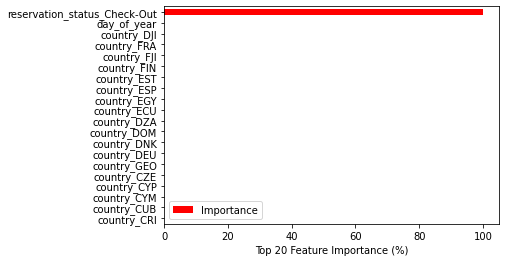

In [ ]:
clf_rf = DecisionTreeClassifier(max_depth=12).fit(X_train, y_train)
pd.DataFrame(data = clf_rf.feature_importances_ * 100, 
             columns = ['Importance'], 
             index = X_train.columns)\
                .sort_values('Importance', ascending=True)[-20:]\
                .plot(kind='barh', color='r')

plt.xlabel("Top 20 Feature Importance (%)")

In [ ]:
## drop `reservation_status` 
df_select = df_select.drop(['reservation_status_Canceled'], axis=1)
df_select = df_select.drop(['reservation_status_Check-Out'], axis=1)
df_select = df_select.drop(['reservation_status_No-Show'], axis=1)

> remove `reservation_status` out of X b/c it's just a different expression of y `is_canceled`

In [ ]:
df_select

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BGR,country_BHR,country_BHS,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,day_of_week,day_of_year
0,0,342,2015,7,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,182
1,0,737,2015,7,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,182
2,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,3,183
3,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,3,183
4,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,4,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,8,35,31,2,8,2,1.0,0,0,0,0,1,143.0,0.0,0,89.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,6,253
40056,0,169,2017,8,35,30,2,9,2,0.0,0,0,0,0,0,250.0,0.0,0,202.27,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,6,253
40057,0,204,2017,8,35,29,4,10,2,0.0,0,0,0,0,0,250.0,0.0,0,153.57,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,255
40058,0,211,2017,8,35,31,4,10,2,0.0,0,0,0,0,0,40.0,0.0,0,112.80,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3,257


## New Feature Construction

'df_select` -> `data`

In [ ]:
data = df_select.copy()

In [ ]:
## Reconstruct `adults`, `children`, `babies` as 
## a new binary feature `is_family` and a new numerical feature `customer_number`
## Reconstruct `stays_in_week_nights` and `stays_in_weekend_nights`  
## as a new numerical feature `night_number`
def is_family(data):
  if ((data['adults'] > 0) & (data['children'] + data['babies'] > 0)):
    return 1
  else:
    return 0

data['is_family'] = data.apply(is_family, axis=1)
data['customer_number'] = data['adults'] + data['children'] + data['babies']
data['night_number'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [ ]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BGR,country_BHR,country_BHS,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,day_of_week,day_of_year,is_family,customer_number,night_number
0,0,342,2015,7,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,182,0,2.0,0
1,0,737,2015,7,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,182,0,2.0,0
2,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,3,183,0,1.0,1
3,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,3,183,0,1.0,1
4,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,4,184,0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,8,35,31,2,8,2,1.0,0,0,0,0,1,143.0,0.0,0,89.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,6,253,1,3.0,10
40056,0,169,2017,8,35,30,2,9,2,0.0,0,0,0,0,0,250.0,0.0,0,202.27,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,6,253,0,2.0,11
40057,0,204,2017,8,35,29,4,10,2,0.0,0,0,0,0,0,250.0,0.0,0,153.57,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,255,0,2.0,14
40058,0,211,2017,8,35,31,4,10,2,0.0,0,0,0,0,0,40.0,0.0,0,112.80,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3,257,0,2.0,14


In [ ]:
## Export as csv file
data.to_csv('hotel_bookings_processed.csv', index=False)
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
!cp hotel_bookings_processed.csv "/content/drive/Shareddrives/CIS 520/final project"